# MNIST GAN 0.3b

Experimenting with Two Time-Scale Update Rule (TTUR), i.e. different learning rates for the generator and discriminator.

Note - literature suggests setting the discriminator learning rate higher than
the generator.

In [1]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session

import pickle

In [2]:
mnist_ex.preprocess_real(save_only=True)
real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
real_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 32, 32, 1)

In [5]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, 
                latent_dims=50, verbose=True, lr=(1e-4, 4e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26112     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 64)          204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)          0 

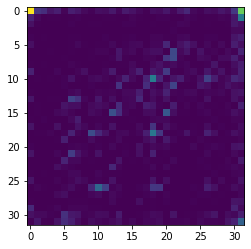

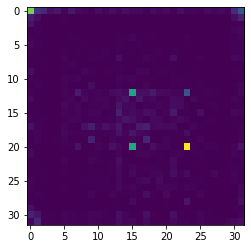

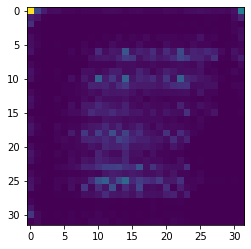

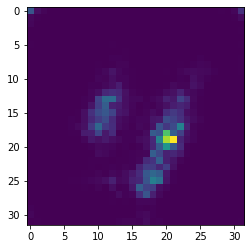

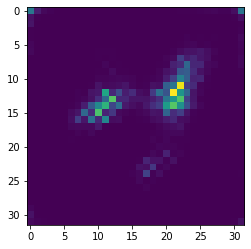

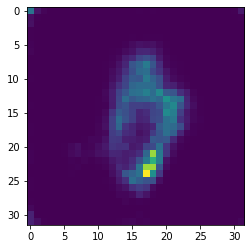

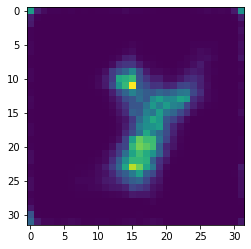

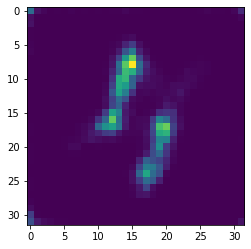

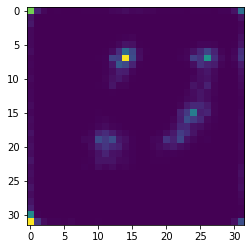

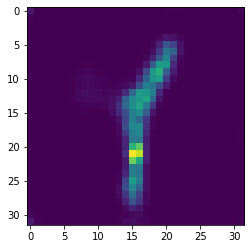

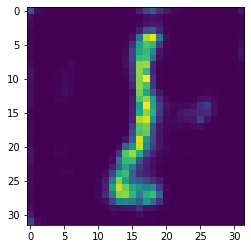

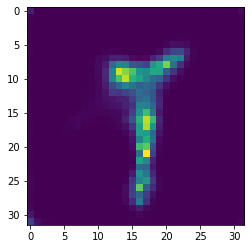

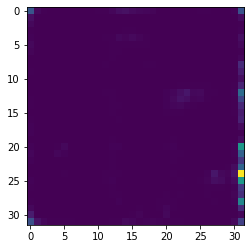

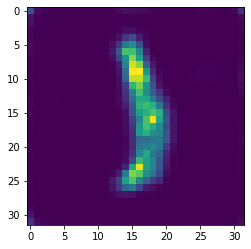

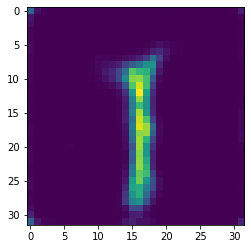

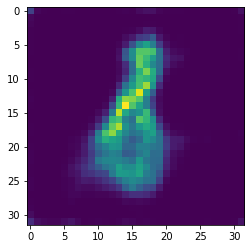

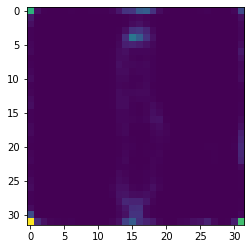

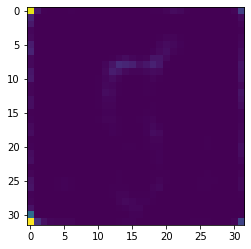

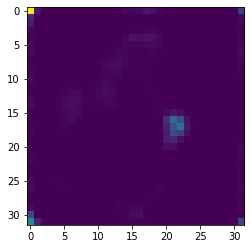

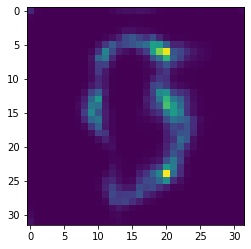

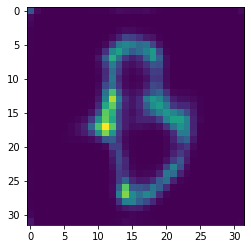

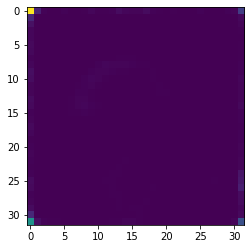

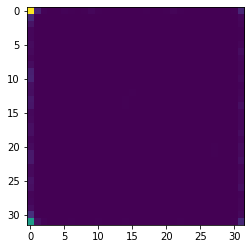

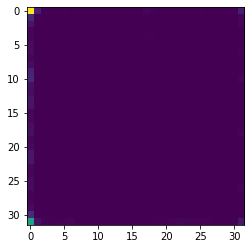

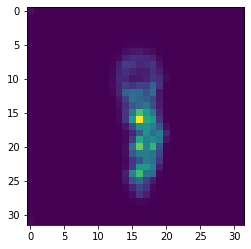

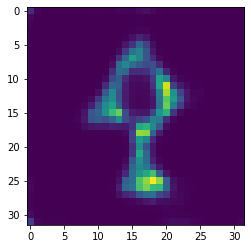

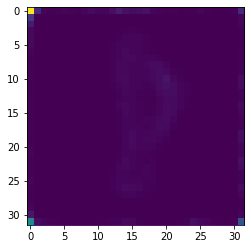

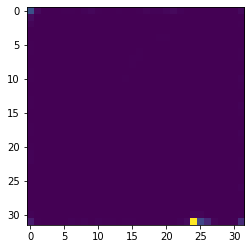

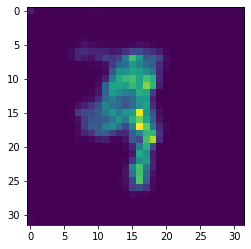

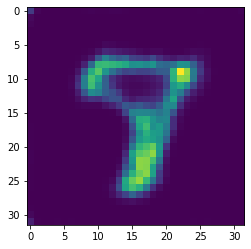

In [6]:
model.train(real_train, num_epochs=30, batch_size=30)

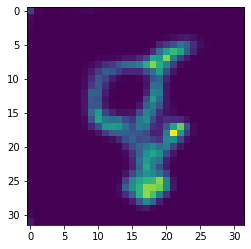

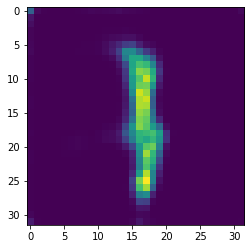

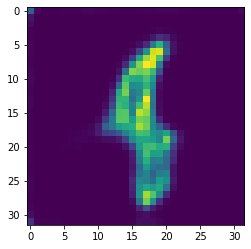

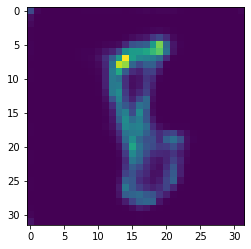

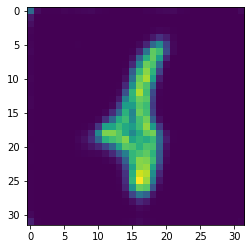

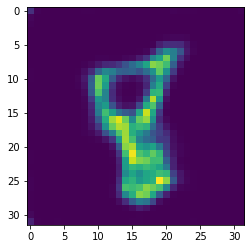

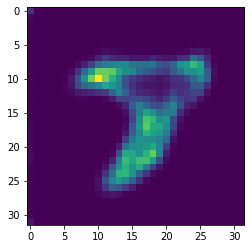

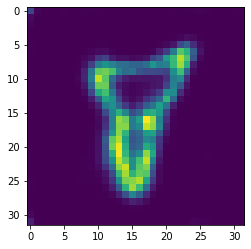

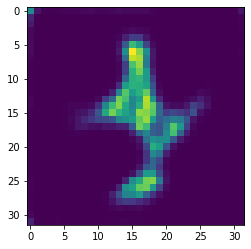

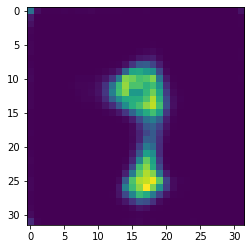

In [12]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 50))
  plt.imshow(fake_img.reshape(32, 32))
  plt.show()

The above generated images are similar, however, we can discern at least three distinct digits. As such, this run shows slightly lower evidence of modal collapse.

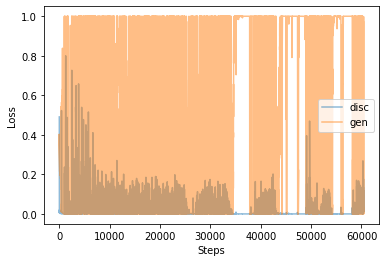

In [10]:
plt.xlabel("Steps")
plt.ylabel("Loss")

plt.plot(model.history.disc_loss, label="disc", alpha=0.5)
plt.plot(model.history.gen_loss, label="gen", alpha=0.5)
plt.legend()
plt.show()

The discriminator's performance seems to be less stable in this run as compared to one-sided label smoothing (run 0.3a).

Nevertheless, on the basis of the evidence of less modal collapse as well as the generally promising generated images:

*Decision:* ACCEPT the Two Time-Scale Update Rule

In [13]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")

  adding: content/Training_Runs/ (stored 0%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/ (stored 0%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch5.png (deflated 16%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch4.png (deflated 15%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch30.png (deflated 15%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch13.png (deflated 16%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch8.png (deflated 16%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch26.png (deflated 15%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch6.png (deflated 15%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoch12.png (deflated 16%)
  adding: content/Training_Runs/a7a22763-4a5f-436a-b825-6b03b3265396/img_epoc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!rm temp_file.zip